# Scikit-learn

In [9]:
import pandas as pd
import numpy as np
import matplotlib as mpl #rarely use mpl directly
import matplotlib.pyplot as plt #rather using pyplot more
import seaborn as sns

In [6]:
url = "https://raw.githubusercontent.com/jennyonjourney/jupyter-demo/main/daag_books.csv"
books = pd.read_csv(url, index_col=0)
print(books.head(5))

   volume  area  weight cover
1     885   382     800    hb
2    1016   468     950    hb
3    1125   387    1050    hb
4     239   371     350    hb
5     701   371     750    hb


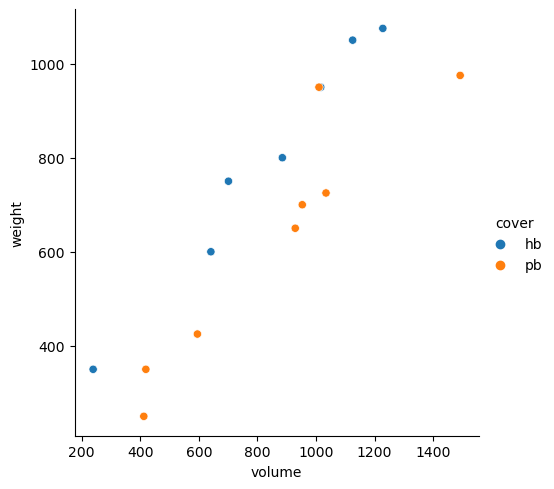

In [10]:
sns.relplot(data=books, x="volume",y="weight",hue="cover")

## Linear regression

In [11]:
from sklearn.linear_model import LinearRegression

In [20]:
# input : np array (2d)
lm = LinearRegression()
m = lm.fit(
    X = books[["volume"]], #np.arrage(books.volume) won't work!!!
    y = books.weight
)
m.coef_ ; lm_coef_ # lm and m are labels for the same object

array([0.70863714])

In [15]:
m.intercept_ ; lm.intercept_

107.679310613766

In [23]:
lm.fit(
    X = np.array(books.volume).reshape(-1,1),
    y = books.weight
)

LinearRegression()

In [24]:
lm.get_params()
# lm.set_params(fit_intercept = False) then intercept is not shown

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [25]:
lm.predict(X=books[["volume"]])

/Users/kyungeunjeon/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([ 734.8231825 ,  827.65464828,  904.89609691,  277.04358788,
        604.43394812,  561.91571951,  977.88572267,  399.63781368,
        783.01050825,  766.0032168 , 1164.96592852,  404.59827369,
        823.40282542,  529.31841092,  840.41011686])

In [26]:
books["weight_lm_pred"] = lm.predict(X=books[["volume"]])
books

/Users/kyungeunjeon/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,volume,area,weight,cover,weight_lm_pred
1,885,382,800,hb,734.823182
2,1016,468,950,hb,827.654648
3,1125,387,1050,hb,904.896097
4,239,371,350,hb,277.043588
5,701,371,750,hb,604.433948
6,641,367,600,hb,561.915720
7,1228,396,1075,hb,977.885723
8,412,0,250,pb,399.637814
9,953,0,700,pb,783.010508
10,929,0,650,pb,766.003217


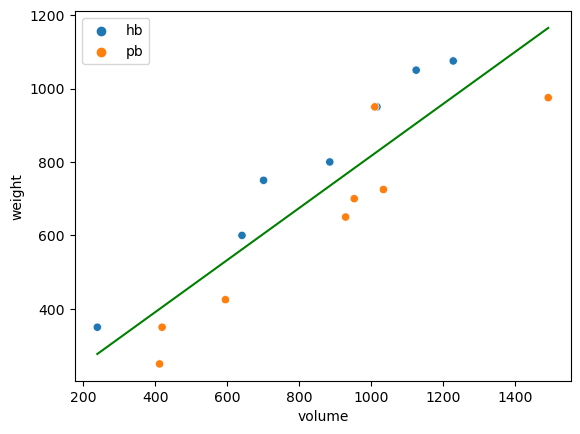

In [27]:
plt.figure()
sns.scatterplot(data=books, x="volume", y="weight", hue="cover")
sns.lineplot(data=books, x="volume", y="weight_lm_pred", color="green")
plt.show()

### Residuals

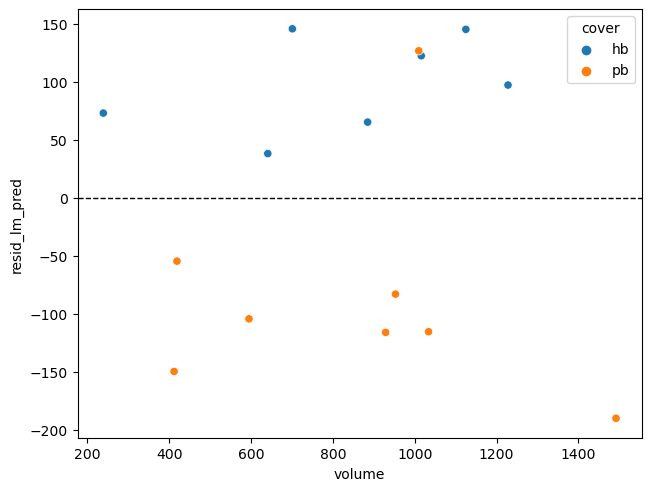

In [28]:
# get the diff (residuals)
books["resid_lm_pred"] = books["weight"] - books["weight_lm_pred"]

# empty figure
plt.figure(layout="constrained")
# ax graph for plotting and line
ax = sns.scatterplot(data=books, x="volume", y="resid_lm_pred", hue="cover")
ax.axhline(c="k", ls="--", lw=1)
plt.show()

In [29]:
# categorical variables
lm = lm.fit(
  X = books[["volume", "cover"]],
  y = books.weight
)

ValueError: could not convert string to float: 'hb'

In [32]:
pd.get_dummies(books[["cover"]])

,cover_hb,cover_pb
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,0,1
9,0,1
10,0,1


In [33]:
pd.get_dummies(books[["volume","cover"]]) #one-hot encoding
# drop first column : https://towardsdatascience.com/drop-first-can-hurt-your-ols-regression-models-interpretability-4ca529cfb707
pd.get_dummies(books[["volume","cover"]],drop_first = True)

,volume,cover_pb
1,885,0
2,1016,0
3,1125,0
4,239,0
5,701,0
6,641,0
7,1228,0
8,412,1
9,953,1
10,929,1


In [34]:
lm = LinearRegression().fit(
  X = pd.get_dummies(books[["volume", "cover"]]),
  y = books.weight
)

lm.intercept_
lm.coef_

array([  0.71795374,  92.02363569, -92.02363569])

In [35]:
lm = LinearRegression().fit(
  X = pd.get_dummies(books[["volume", "cover"]],drop_first = True),
  y = books.weight
)

lm.intercept_
lm.coef_

array([   0.71795374, -184.04727138])

In [37]:
# Comparing it with R
# d = read.csv('data/daag_books.csv')
# d['cover_hb'] = ifelse(d$cover == "hb", 1, 0)
# d['cover_pb'] = ifelse(d$cover == "pb", 1, 0)
# (lm = lm(weight~volume+cover_hb+cover_pb, data=d))
# summary(lm)

array([   0.71795374, -184.04727138])

In [39]:
# fit_intercept is what for? the data should be centered. & Avoiding co-linearity
lm = LinearRegression(fit_intercept = False).fit(
  X = pd.get_dummies(books[["volume", "cover"]],drop_first=True),
  y = books.weight
)

lm.intercept_
lm.coef_
lm.feature_names_in_

array(['volume', 'cover_pb'], dtype=object)

### Preprocessors

In [40]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)
enc.fit(X = books[["cover"]])
enc.transform(X = books[["cover"]])

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [41]:
enc = OneHotEncoder(sparse=False, drop="first")
enc.fit_transform(X = books[["cover"]])

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [42]:
enc.get_feature_names_out()

array(['cover_pb'], dtype=object)

In [43]:
# inverse (undo) transform
f = enc.transform(X = books[["cover"]])
enc.inverse_transform(f)

array([['hb'],
       ['hb'],
       ['hb'],
       ['hb'],
       ['hb'],
       ['hb'],
       ['hb'],
       ['pb'],
       ['pb'],
       ['pb'],
       ['pb'],
       ['pb'],
       ['pb'],
       ['pb'],
       ['pb']], dtype=object)

In [45]:
enc = OneHotEncoder(sparse=False)
X = enc.fit_transform(
  X = books[["volume", "cover"]]
)

pd.DataFrame(
  data=X,
  columns = enc.get_feature_names_out()
)
# columna name is changed!!! not that facncy then get_dummies() 
# => need to use it only for categorical data

,volume_239,volume_412,volume_419,volume_595,volume_641,volume_701,volume_885,volume_929,volume_953,volume_1010,volume_1016,volume_1034,volume_1125,volume_1228,volume_1492,cover_hb,cover_pb
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [46]:
cover = OneHotEncoder(
  sparse=False
).fit_transform(
  books[["cover"]]
) # full one-hot encoding

X = np.c_[books.volume, cover]
X

array([[8.850e+02, 1.000e+00, 0.000e+00],
       [1.016e+03, 1.000e+00, 0.000e+00],
       [1.125e+03, 1.000e+00, 0.000e+00],
       [2.390e+02, 1.000e+00, 0.000e+00],
       [7.010e+02, 1.000e+00, 0.000e+00],
       [6.410e+02, 1.000e+00, 0.000e+00],
       [1.228e+03, 1.000e+00, 0.000e+00],
       [4.120e+02, 0.000e+00, 1.000e+00],
       [9.530e+02, 0.000e+00, 1.000e+00],
       [9.290e+02, 0.000e+00, 1.000e+00],
       [1.492e+03, 0.000e+00, 1.000e+00],
       [4.190e+02, 0.000e+00, 1.000e+00],
       [1.010e+03, 0.000e+00, 1.000e+00],
       [5.950e+02, 0.000e+00, 1.000e+00],
       [1.034e+03, 0.000e+00, 1.000e+00]])

In [47]:
lm2 = LinearRegression(fit_intercept=False).fit(
  X = X,
  y = books.weight
)

lm2.coef_

array([  0.71795374, 197.96284357,  13.91557219])

In [49]:
books["weight_lm2_pred"] = lm2.predict(X=X)
books

,volume,area,weight,cover,weight_lm_pred,resid_lm_pred,weight_lm2_pred
1,885,382,800,hb,734.823182,65.176818,833.351907
2,1016,468,950,hb,827.654648,122.345352,927.403847
3,1125,387,1050,hb,904.896097,145.103903,1005.660805
4,239,371,350,hb,277.043588,72.956412,369.553788
5,701,371,750,hb,604.433948,145.566052,701.248418
6,641,367,600,hb,561.915720,38.084280,658.171193
7,1228,396,1075,hb,977.885723,97.114277,1079.610041
8,412,0,250,pb,399.637814,-149.637814,309.712515
9,953,0,700,pb,783.010508,-83.010508,698.125490
10,929,0,650,pb,766.003217,-116.003217,680.894600


In [50]:
books.drop(["weight_lm_pred", "resid_lm_pred"], axis=1)

,volume,area,weight,cover,weight_lm2_pred
1,885,382,800,hb,833.351907
2,1016,468,950,hb,927.403847
3,1125,387,1050,hb,1005.660805
4,239,371,350,hb,369.553788
5,701,371,750,hb,701.248418
6,641,367,600,hb,658.171193
7,1228,396,1075,hb,1079.610041
8,412,0,250,pb,309.712515
9,953,0,700,pb,698.125490
10,929,0,650,pb,680.894600


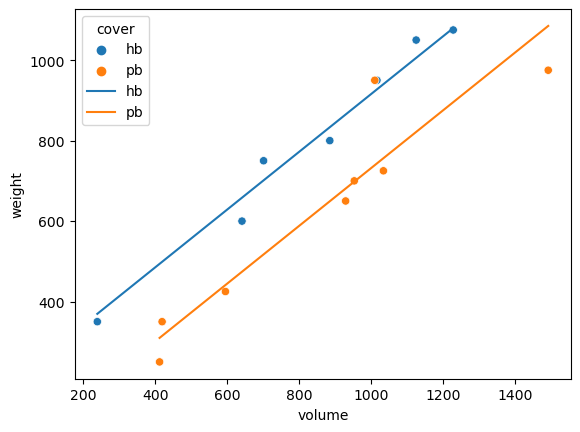

In [52]:
plt.figure()
sns.scatterplot(data=books, x="volume", y="weight", hue="cover")
sns.lineplot(data=books, x="volume", y="weight_lm2_pred", hue="cover")
plt.show()

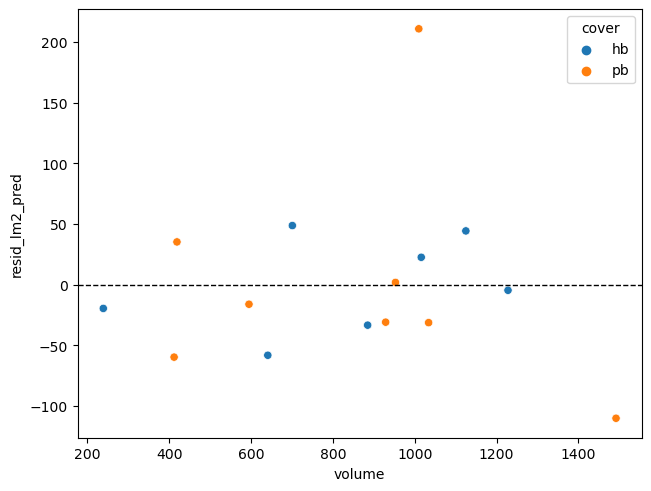

In [53]:
books["resid_lm2_pred"] = books["weight"] - books["weight_lm2_pred"]

plt.figure(layout="constrained")
ax = sns.scatterplot(data=books, x="volume", y="resid_lm2_pred", hue="cover")
ax.axhline(c="k", ls="--", lw=1)
plt.show()

## Model performance

In [55]:
from sklearn.metrics import mean_squared_error, r2_score

In [56]:
r2_score(books.weight, books.weight_lm_pred)
mean_squared_error(books.weight, books.weight_lm_pred) # MSE
mean_squared_error(books.weight, books.weight_lm_pred, squared=False) # RMSE

115.38368348993234

In [57]:
r2_score(books.weight, books.weight_lm2_pred)
mean_squared_error(books.weight, books.weight_lm2_pred) # MSE
mean_squared_error(books.weight, books.weight_lm2_pred, squared=False) # RMSE

69.94312276839727

### Excercise 1

In [62]:
books = pd.read_csv(url, index_col=0)
cover = pd.get_dummies(books[["cover"]],drop_first=True)

1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: cover_pb, dtype: uint8

In [63]:
X = np.c_[
    books.volume,
    cover.cover_pb,
    cover.cover_pb * books.volume
]
X

array([[ 885,    0,    0],
       [1016,    0,    0],
       [1125,    0,    0],
       [ 239,    0,    0],
       [ 701,    0,    0],
       [ 641,    0,    0],
       [1228,    0,    0],
       [ 412,    1,  412],
       [ 953,    1,  953],
       [ 929,    1,  929],
       [1492,    1, 1492],
       [ 419,    1,  419],
       [1010,    1, 1010],
       [ 595,    1,  595],
       [1034,    1, 1034]])

In [64]:
lm = LinearRegression().fit(X=X, y=books.weight)

In [65]:
(lm.intercept_,
lm.coef_)

(161.5865414110442, array([ 7.61592838e-01, -1.20214066e+02, -7.57336630e-02]))

## Polynomial regression

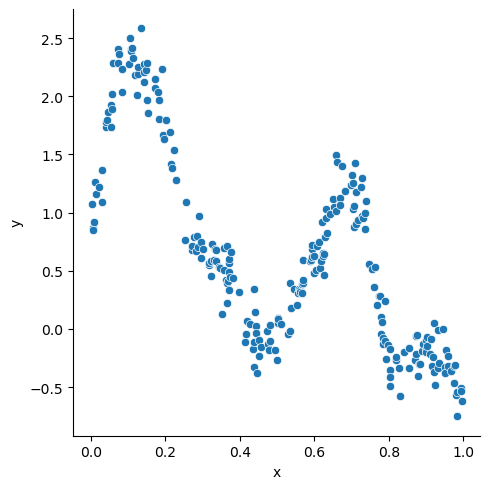

In [70]:
%matplotlib inline
df = pd.read_csv("https://raw.github.com/Sta663-Sp22/sta663-sp22.github.io/master/slides/data/gp.csv")
sns.relplot(data=df, x="x", y="y")

In [72]:
X = np.c_[
    np.ones(df.shape[0]),
    df.x,
    df.x**2,
    df.x**3
]

plm = LinearRegression(fit_intercept = False).fit(X=X, y=df.y)

plm.coef_

array([ 2.36985684, -8.49429068, 13.95066369, -8.39215284])

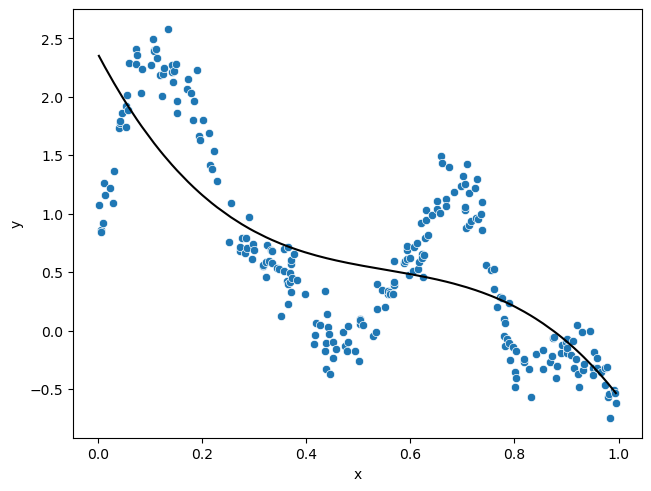

In [73]:
df["y_pred"] = plm.predict(X=X)
plt.figure(layout="constrained")
sns.scatterplot(data=df, x="x", y="y")
sns.lineplot(data=df, x="x", y="y_pred", color="k")
plt.show()

In [74]:
from sklearn.preprocessing import PolynomialFeatures
X = np.array(range(6)).reshape(-1,1)
pf = PolynomialFeatures(degree=3)
pf.fit(X)
pf.transform(X)
pf.get_feature_names_out()

array(['1', 'x0', 'x0^2', 'x0^3'], dtype=object)

In [75]:
X.reshape(-1, 2)

pf = PolynomialFeatures(degree=3, include_bias=False)
pf.fit_transform(X.reshape(-1, 2))
pf.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2',
       'x1^3'], dtype=object)

In [77]:
def poly_model(X, y, degree):
    X  = PolynomialFeatures(
        degree=degree, include_bias=False
        ).fit_transform(X=X)
    y_pred = LinearRegression().fit(X=X, y=y).predict(X)
    return mean_squared_error(y, y_pred, squared=False)

poly_model(X = df[["x"]], y = df.y, degree = 2)
poly_model(X = df[["x"]], y = df.y, degree = 3)

0.5208157900621084

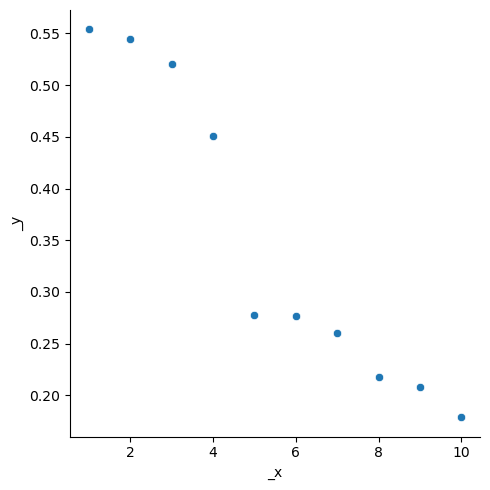

In [78]:
degrees = range(1,11)
rmses = [poly_model(X=df[["x"]], y=df.y, degree=d) 
         for d in degrees]
sns.relplot(x=degrees, y=rmses)

## Pipelines

In [79]:
# https://zephyrus1111.tistory.com/254

from sklearn.pipeline import make_pipeline

p = make_pipeline(
    PolynomialFeatures(degree=4),
    LinearRegression()
)

p

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression())])

In [84]:
p = p.fit(X = df[["x"]], y = df.y)
p

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression())])

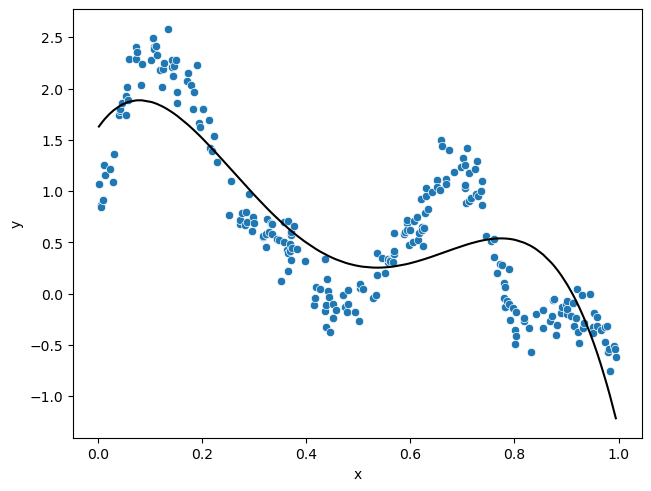

In [85]:
p.predict(X = df[["x"]])
plt.figure(layout="constrained")
sns.scatterplot(data=df, x="x", y="y")
sns.lineplot(x=df.x, y=p.predict(X = df[["x"]]), color="k")
plt.show()

In [86]:
p.coef_

AttributeError: 'Pipeline' object has no attribute 'coef_'

In [87]:
p.named_steps["linearregression"].intercept_
p.steps[1][1].coef_
p.steps

[('polynomialfeatures', PolynomialFeatures(degree=4)),
 ('linearregression', LinearRegression())]

In [88]:
p.steps[0][1].get_feature_names_out()

array(['1', 'x', 'x^2', 'x^3', 'x^4'], dtype=object)

In [90]:
p.named_steps["linearregression"].get_params()
p.named_steps["linearregression"].set_params(fit_intercept=False)
p.fit(X = df[["x"]], y = df.y)
p.named_steps["linearregression"].intercept_
p.named_steps["linearregression"].coef_

array([  1.61366366,   7.39051417, -57.67175293, 102.72227443,
       -55.38181361])

### Tuning parameter

In [91]:
# built in automated tuning
from sklearn.model_selection import GridSearchCV, KFold

p = make_pipeline(
    PolynomialFeatures(include_bias=True),
    LinearRegression(fit_intercept=False)
)

grid_search = GridSearchCV(
  estimator = p, 
  param_grid = {"polynomialfeatures__degree": range(1,11)},
  scoring = "neg_root_mean_squared_error",
  cv = KFold(shuffle=True)
)

grid_search

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression(fit_intercept=False))]),
             param_grid={'polynomialfeatures__degree': range(1, 11)},
             scoring='neg_root_mean_squared_error')